In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rosbag
from scipy.signal import savgol_filter
%matplotlib inline

# Import Rosbag Data

In [15]:
ls

log_steer_2020-07-17-09-43-48.bag  steering_angle_calibration.ipynb


In [3]:
bag = rosbag.Bag('log_steer_2020-07-17-09-43-48.bag')
bag.get_type_and_topic_info()

TypesAndTopicsTuple(msg_types={'pkg_ta/Steering': 'fd8739ce284d08bb769f85965f7fc99b'}, topics={'/logging_steering': TopicTuple(msg_type='pkg_ta/Steering', message_count=12003, connections=1, frequency=244.23828102253538)})

In [4]:
list_topic = []
list_msg = []
list_t = []
list_seq = []
list_t_header = []
list_steering_setpoint = []
list_steering_delta = []
list_steering_angle = []
list_steering_absolute_encoder = []

for topic, msg, t in bag.read_messages(topics=['/logging_steering']):
    list_topic.append(topic)
    list_msg.append(msg)
    list_t.append(t.secs + t.nsecs/1e9)
    list_seq.append(msg.header.seq)
    list_t_header.append(msg.header.stamp.secs + msg.header.stamp.nsecs / 1e9)
    list_steering_setpoint.append(msg.steering_setpoint)
    list_steering_delta.append(msg.steering_delta)
    list_steering_angle.append(msg.steering_angle)
    list_steering_absolute_encoder.append(msg.steering_absolute_encoder)
    
list_t = np.array(list_t)
list_t -= list_t[0]
list_t_header = np.array(list_t_header)
list_t_header -= list_t_header[0]

dt = list_t[1:] - list_t[:-1]
dt_header = list_t_header[1:] - list_t_header[:-1]

t_filtered = savgol_filter(np.array(list_t), 101, 3)
t_header_filtered = savgol_filter(np.array(list_t_header), 101, 3)

steering_delta = savgol_filter(np.array(list_steering_delta), 101, 3)
steering_angle = savgol_filter(np.array(list_steering_angle), 101, 3)
w_filtered = savgol_filter(np.gradient(steering_angle, t_filtered), 101, 3)
w_filtered_header = savgol_filter(np.gradient(steering_angle, t_header_filtered), 101, 3)

# Cek Data

In [5]:
print("RATA-RATA")
pos = [2700, 4600]
print((steering_angle[pos[1]] - steering_angle[pos[0]]) / (list_t[pos[1]] - list_t[pos[0]]))
print((steering_angle[pos[1]] - steering_angle[pos[0]]) / (list_t_header[pos[1]] - list_t_header[pos[0]]))
pos = [6300, 7900]
print((steering_angle[pos[1]] - steering_angle[pos[0]]) / (list_t[pos[1]] - list_t[pos[0]]))
print((steering_angle[pos[1]] - steering_angle[pos[0]]) / (list_t_header[pos[1]] - list_t_header[pos[0]]))

RATA-RATA
-6.274800709894919
-6.273492714820798
6.211327627706553
6.209320511489257


Sampling Rate yang digunakan di rospy adalah 200 Hz

dt
mean: 0.004101099778842656
std: 0.0007304474952043859

dt_header
mean: 0.004102051327614323
std: 0.00037154571017208773



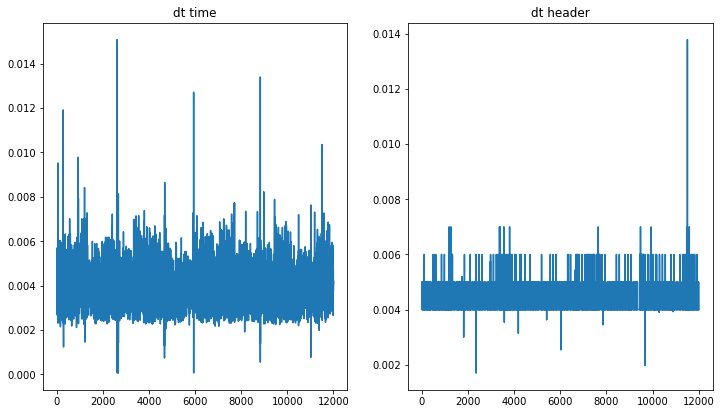

In [6]:
print('Sampling Rate yang digunakan di rospy adalah 200 Hz\n')
print('dt')
print('mean: {}'.format(np.mean(dt)))
print('std: {}'.format(np.std(dt)))
print('\ndt_header')
print('mean: {}'.format(np.mean(dt_header)))
print('std: {}'.format(np.std(dt_header)))
print('')

scale = 0.75
plt.figure(figsize=(16*scale, 9*scale))
plt.subplot(1,2,1)
plt.plot(dt)
plt.title("dt time")
plt.subplot(1,2,2)
plt.plot(dt_header)
plt.title("dt header")
plt.show()

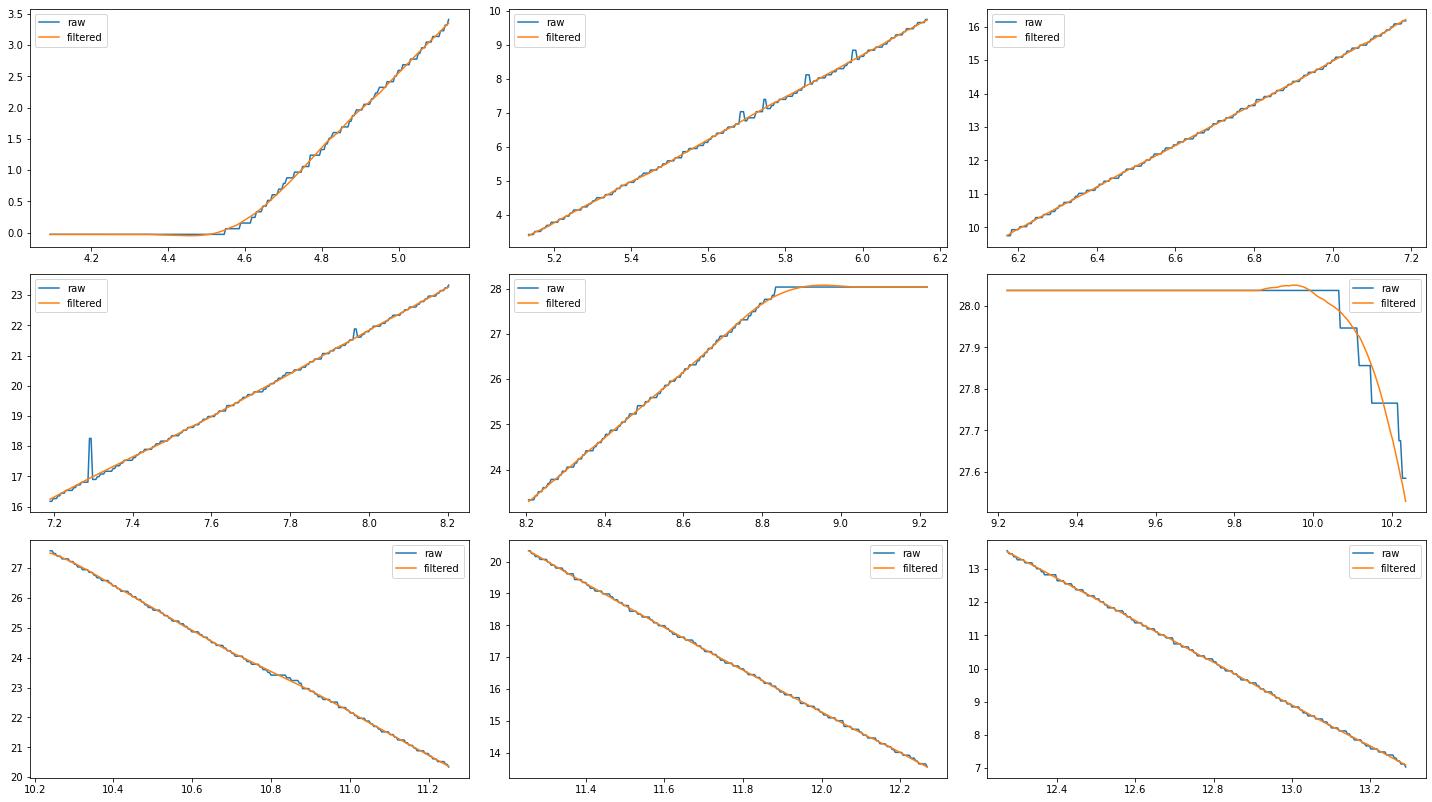

In [7]:
pos = [[1000+250*i, 1000+250*(i+1)] for i in range(9)]

scale = 1.25
plt.figure(figsize=(16*scale, 9*scale))

for i in range(len(pos)):
    plt.subplot(3, 3, i + 1)
    plt.plot(list_t_header[pos[i][0]:pos[i][1]], list_steering_angle[pos[i][0]:pos[i][1]], label='raw')
    plt.plot(list_t_header[pos[i][0]:pos[i][1]], steering_angle[pos[i][0]:pos[i][1]], label='filtered')
    plt.legend()
    
plt.tight_layout()    

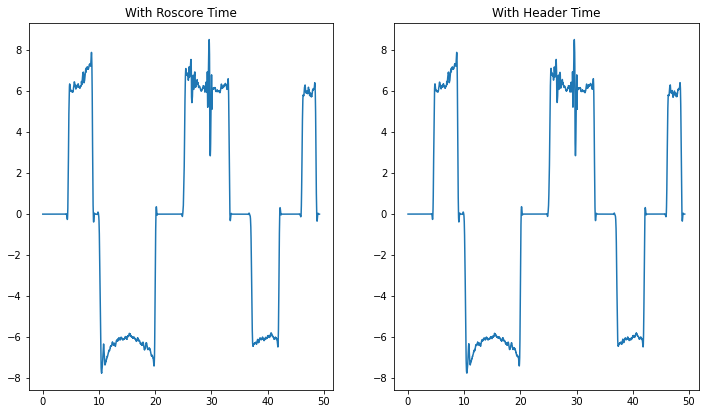

In [8]:
scale = 0.75
plt.figure(figsize=(16*scale, 9*scale))
plt.subplot(1,2,1)
plt.plot(list_t, w_filtered)
plt.title("With Roscore Time")
plt.subplot(1,2,2)
plt.plot(list_t_header, w_filtered_header)
plt.title("With Header Time")
plt.show()

# Analisis Data

In [16]:
pos = [2200, 9000]

t_filtered = savgol_filter(np.array(list_t)[pos[0]:pos[1]], 101, 3)
t_header_filtered = savgol_filter(np.array(list_t_header)[pos[0]:pos[1]], 101, 3)

steering_delta = savgol_filter(np.array(list_steering_delta)[pos[0]:pos[1]], 101, 3)
steering_angle = savgol_filter(np.array(list_steering_angle)[pos[0]:pos[1]], 101, 3)
w_filtered = savgol_filter(np.gradient(steering_angle, t_filtered), 101, 3)
w_filtered_header = savgol_filter(np.gradient(steering_angle, t_header_filtered), 101, 3)

In [ ]:
pos = [[1000+250*i, 1000+250*(i+1)] for i in range(9)]

scale = 1.25
plt.figure(figsize=(16*scale, 9*scale))

for i in range(len(pos)):
    plt.subplot(3, 3, i + 1)
    plt.plot(list_t_header[pos[i][0]:pos[i][1]], list_steering_angle[pos[i][0]:pos[i][1]], label='raw')
    plt.plot(list_t_header[pos[i][0]:pos[i][1]], steering_angle[pos[i][0]:pos[i][1]], label='filtered')
    plt.legend()
    
plt.tight_layout()    

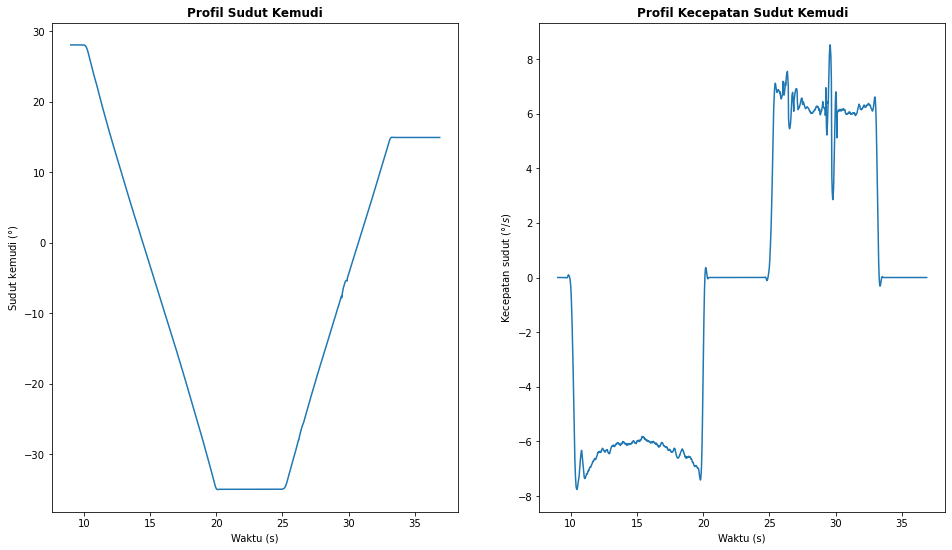

In [39]:
scale = 1.
plt.figure(figsize=(16*scale, 9*scale))

# Plot the steering angle
plt.subplot(1,2,1)
plt.plot(list_t_header[pos[0]:pos[1]], steering_angle)
plt.xlabel('Waktu (s)')
plt.ylabel(r'Sudut kemudi $(\degree)$')
plt.title('Profil Sudut Kemudi', fontweight='bold')

# Plot the steering angle
plt.subplot(1,2,2)
plt.plot(list_t_header[pos[0]:pos[1]], w_filtered_header)
plt.xlabel('Waktu (s)')
plt.ylabel(r'Kecepatan sudut $(\degree/s)$')
plt.title('Profil Kecepatan Sudut Kemudi', fontweight='bold')

plt.savefig('kalibrasi_absolute_encoder.png', dpi=500, transparent=True)
plt.show()